# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

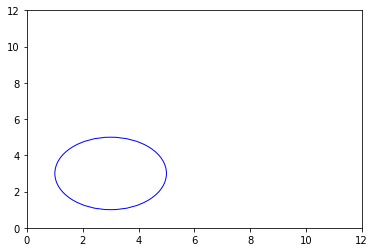

In [7]:
circle1 = plt.Circle((3,3),2, color='b', fill=False)
fig, ax = plt.subplots()
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.add_artist(circle1)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

In [ ]:
# A linear function cannot have repeating domains for each range

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [ ]:
# Only Relation #2 because its domains do not repeat

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In [ ]:
#  The domain is in 3 dimensions and the ouput or range is in one dimenions
# The domain is in four dimensions and the output is in two dimensions

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [ ]:
# You can represent function with a domain in 2 dimensions in a 3 dimensional span because 
# functions like f(x) = x^2 or f(x) = |x+4| which result in 2 outputs per one dimension

# Basically the additional dimension output could just be represented as a linear combination
# of inputs  

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

In [ ]:
# The eigen vector is a vector that if multiplied by a matrix only gets scaled rather than
# rotated. The eigenvalue is that the scaled factor from the original matrix after the 
# eigenvector has been applied

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

In [ ]:
# Relationships are very difficult or impossible to show with greater than 2 dimensions
# It is also difficult to get an idea of which factors are the most explanatory

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In [ ]:
# I believe it is 5n

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [9]:
iris_df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

iris_no_species = iris_df.drop('species', axis='columns')

In [11]:
iris_no_species.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')

In [15]:
pca.fit(iris_no_species).components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [17]:
pca_plot = pca.fit(iris_no_species) 

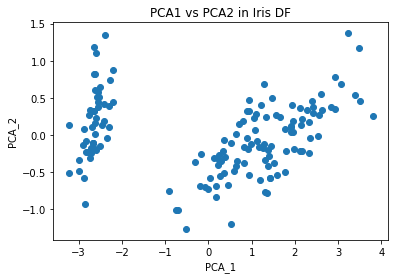

In [64]:
pca_results=pca.transform(iris_no_species)

pca_results=np.array(pca_results)
test = pd.DataFrame(pca_results)
test['PCA_1'] = test[0]
test['PCA_2'] = test[1]
test = test.drop(0, axis=1)
test = test.drop(1, axis=1)

test.shape

plt.scatter(x=test['PCA_1'], y=test['PCA_2'])
plt.title('PCA1 vs PCA2 in Iris DF')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)